## Chemiluminescence-(extracting temperature at different positions for various velocities)

### Usage:
This code is used to determine the temperature at different positions for various velocities.

Quantify temperatures at individual locations (e.g. -2, 0, etc.), and plot results as a function of velocity.


In [1]:
import numpy as np
import pandas as pd
import glob
import scipy as sc
import matplotlib.pylab as plt
%matplotlib inline
import inspect
#%config InlineBackend.figure_formats = ["retina"]
from scipy.optimize import curve_fit
import microfit.database as db
import microfit.hdr as hdr
import microfit.chemiluminescence as chem
import microfit.pyrometry as pyro
#import microfit.analysis as anls
from microfit import analysis
from scipy import stats
from matplotlib.pyplot import figure
import pywt as pw
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
import math
#from scipy import opQtimize as opt
from importlib import reload
import matplotlib.gridspec as gsp
from  matplotlib.ticker import MultipleLocator
import matplotlib as mpl
import warnings
warnings.filterwarnings(action='once')
from operator import itemgetter
from scipy import interpolate
from scipy.interpolate import UnivariateSpline
from PyAstronomy import pyasl
import statistics as ss
from scipy.signal import lfilter
from sklearn.preprocessing import normalize
from scipy.signal import find_peaks, peak_prominences
#warnings.filterwarnings(action='error')

C:\Users\Navid\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Navid\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<Figure size 640x480 with 0 Axes>

In [2]:
plt.style.use('../manuscript.mplstyle')
plt.rcParams['figure.figsize']

[8.0, 5.5]

In [3]:
show = True

In [4]:
xlsx = '../index_2018_02_PRF_data.xlsx'
df = pd.read_excel(xlsx)

C:\Users\Navid\Miniconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


### Select Data for Gaseous Fuels

In [5]:
cases = np.unique(df.case)
cases = [ c for c in cases if c.split('_')[5]=='12.37O2']
cases

['2020_01_06_air_130.34psig_12.37O2_1mm',
 '2020_01_06_isooctane_130.34psig_12.37O2_1mm']

In [6]:
ix = df.case.isin(cases)
rp = db.Database(df[ix],verbosity=2)

### Assignment of Temperature Profiles

In [7]:
seq1 = rp.find_sequence_by('case', phi=0)
seq1

{'2020_01_06_air_130.34psig_12.37O2_1mm': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13]}

In [8]:
seq2 = rp.find_sequence_by('case', phi=1)
seq2

{'2020_01_06_isooctane_130.34psig_12.37O2_1mm': [15,
  16,
  17,
  18,
  19,
  20,
  21,
  23,
  24,
  25,
  26,
  27,
  28]}

In [9]:
folder_name1 = str(cases[0])
folder_name2 = str(cases[1])
print(folder_name1, folder_name2)

2020_01_06_air_130.34psig_12.37O2_1mm 2020_01_06_isooctane_130.34psig_12.37O2_1mm


In [10]:
reload.__name__

'reload'

In [11]:
_ = reload(pyro)
_ = reload(analysis)

In [12]:
x_ext, x_max, x_ign = rp.get_x_flames(seq1,snr=30)

Case: 2020_01_06_air_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_06_air_130.34psig_12.37O2_1mm)
 * get_x_flame -> air_d76.2_v2.0_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <load_raw> ... generate HDR calibration image: cube0_raw1.tif
    <load_raw> ... generate HDR image: air_d76.2_v2.0_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)_raw1.tif
    <perform_analysis> ... creating new `Fourier` object
rejecting apparent diameter: 68.992
0.4921875 0.4921875
rejecting apparent diameter: 69.544
0.48828125 0.48828125
rejecting apparent diameter: 69.544
0.48828125 0.48828125
    <extract_filament> ... extracting `Fourier` filament
    <extract_temperature> ... creating `PyroFrame` object
    <load_raw> ... generate HDR calibration image: cube0_raw2.tif
    <load_raw> ... generate HDR image: air_d76.2_v2.0_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)_raw2.tif
    <perform_analysis> ... creating new `Fourier` object
    <

KeyboardInterrupt: 

In [ ]:
_, _ = rp.extract_temperatures(seq1)

In [ ]:
_ = reload(chem)
_ = reload(analysis)

In [ ]:
frames1 = rp.extract_flames(seq1,camera=2) #,force=True)

In [ ]:
inspect.getsourcefile(rp.extract_flames)

In [ ]:
reload.__name__

In [ ]:
_ = reload(pyro)
_ = reload(analysis)

In [ ]:
x_ext, x_max, x_ign = rp.get_x_flames(seq2,snr=35,force=True)

In [ ]:
_, _ = rp.extract_temperatures(seq2)#snr=30

In [ ]:
_ = reload(chem)
_ = reload(analysis)

In [ ]:
frames2 = rp.extract_flames(seq2,camera=2) #,force=True)

In [ ]:
n_case1 = len(seq1)
n_vels1 = [len(seq1[k]) for k in seq1][0]
n_case1, n_vels1

In [ ]:
test1 = frames1[folder_name1]

In [ ]:
n_vels1

In [ ]:
frames1.keys()

In [ ]:
len(test1)

In [ ]:
vel1 = rp.get_entries(seq1, 'v')
print(vel1)

In [ ]:
title1 = list(frames1.keys())a

In [ ]:
rp.get_entries(seq2, 'v')

In [ ]:
v_f1=vel1[folder_name1]
print(v_f1)

In [ ]:
n_case2 = len(seq2)
n_vels2 = [len(seq2[k]) for k in seq2][0]
n_case2, n_vels2

In [ ]:
test2 = frames2[folder_name2]

In [ ]:
n_vels2

In [ ]:
frames2.keys()

In [ ]:
title2 = list(frames2.keys())
title2[0]

In [37]:
len(test2)

12

In [38]:
vel2 = rp.get_entries(seq2, 'v')
print(vel2)

{'2020_01_10_isooctane_57.8psig_6.04O2_1mm': [4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]}


In [39]:
v_f2=vel2[folder_name2]
print(len(v_f2))

12


# Air signal and T profile

In [40]:
# Moving average
def M_avg(a,b):
    c = []
    for i in range(len(a)):
        if i+b<len(a):
            c.append(sum(a[i:i+b])/b)
        else:
            break
    return np.asarray(c), np.arange(len(c))

In [41]:
#normalize the data (0:1)
def norm(a):
    b = 2*(a-np.amin(a))/(np.amax(a)-np.amin(a))-1
    return b

In [42]:
#Zero corssing
def zero_cross(array):
    a = np.argmin(array)   
    zero_crossings = np.where(np.diff(np.sign(array[a:])))[0]
    first_zero = zero_crossings[0]
    final = first_zero + a
    return final
        

### Mask Function

In [75]:
def mask(Channel, Image,X):
    ys = Channel.pos.tube_outline(X)
    IDb = int(np.mean(ys['IDb']))+2
    ODb = int(np.mean(ys['ODb']))+2
    DIF = ODb-IDb
    msk = np.sin(np.pi*(np.arange(IDb, ODb) - IDb) / DIF)
    f = Image.copy()
    f[IDb:ODb, :] = np.repeat(msk[: ,np.newaxis], f.shape[1], axis=1)
    f[ODb:,:]= f[:IDb,:] = 0
    new = np.multiply(f,Image)
    return new

Case: 2020_01_10_isooctane_57.8psig_6.04O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_10_isooctane_57.8psig_6.04O2_1mm)
 * perform_analysis -> isooctane_d76.2_v4.0_phi1.00_ps57.80_pa57.800000_pref1.455000_(ve160_phie0.65)
    <perform_analysis> ... returning buffered `Fourier` object
Case: 2020_01_10_isooctane_57.8psig_6.04O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_10_isooctane_57.8psig_6.04O2_1mm)
 * perform_analysis -> isooctane_d76.2_v5.0_phi1.00_ps57.80_pa57.800000_pref1.455000_(ve160_phie0.65)
    <perform_analysis> ... returning buffered `Fourier` object
Case: 2020_01_10_isooctane_57.8psig_6.04O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_10_isooctane_57.8psig_6.04O2_1mm)
 * perform_analysis -> isooctane_d76.2_v6.0_phi1.00_ps57.80_pa57.800000_pref1.455000_(ve160_phie0.65)
    <perform_analysis> ... returning buffered `Fourier` object
Case: 2020_01_10_isooctane_57.8psig_6.04O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_10_isooctane_57.8psig_6

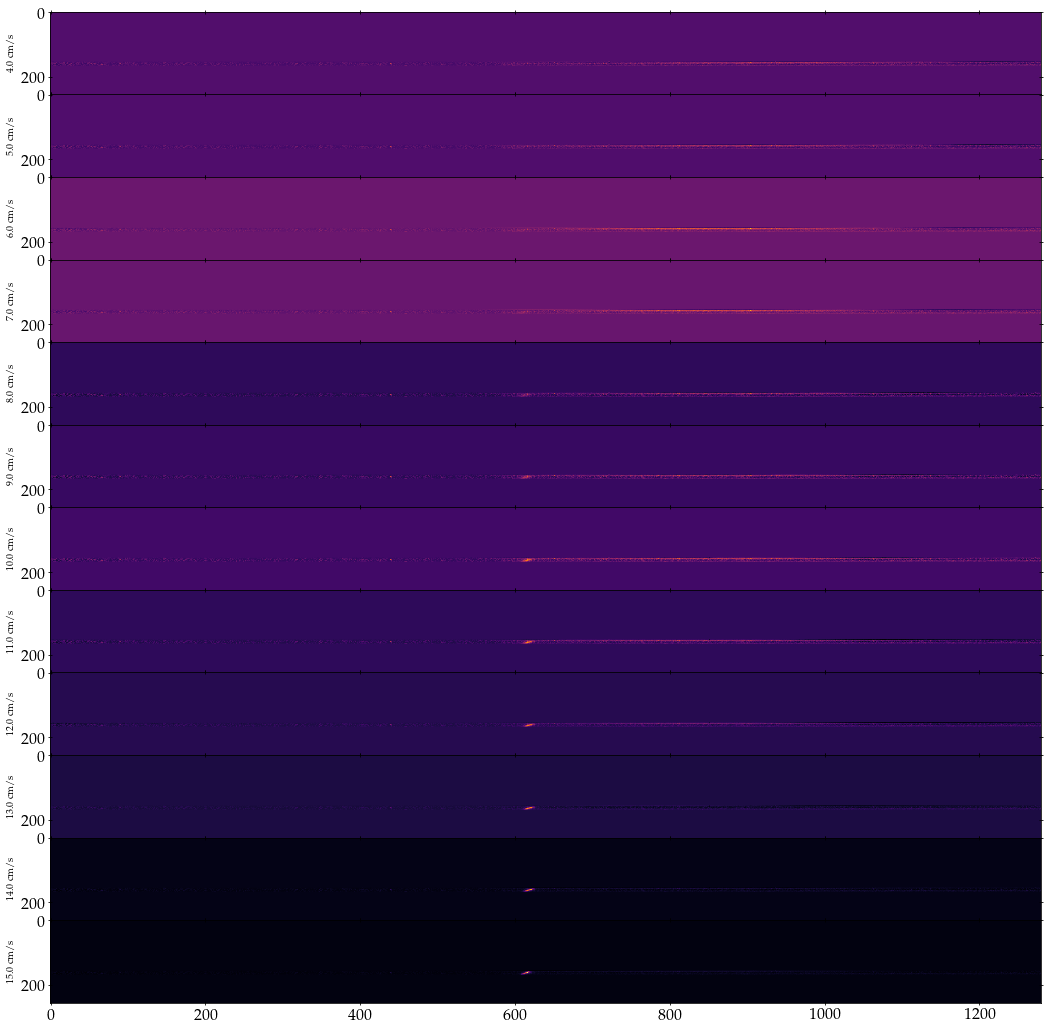

In [76]:
ch = 'f430x10h'
h = cases[1] #fuel 
xs = np.array([0,1280])
fig, ax = plt.subplots(len(v_f2), 1, sharex=True, sharey=True, figsize=(16,16))
for i in range(len(v_f2)):
    seq3 = rp.find_sequence_by('case',v=v_f2[i], phi =1)
    fft2 = rp.perform_analyses(seq3, camera=2, align=False)
    ggg = fft2[h]
    images = {'difference': ggg.without_filament[ch]}
    hdr3 = rp.get_entries(seq3,'hdr2')
    ys = hdr3[h].pos.tube_outline(xs)
    ax[i].imshow(mask(hdr3[h],images['difference'],xs), aspect='auto')
    ax[i].set_ylabel(str(v_f2[i])+' cm/s',fontsize = 10)
#     for pos in ['ODt','ODb']:
#         ax[i].plot(xs,ys[pos],'r-',linewidth=2)
#     for pos in ['IDt','IDb']:
#         ax[i].plot(xs,ys[pos],'r:',linewidth=1)
    

Case: 2020_01_10_isooctane_57.8psig_6.04O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_10_isooctane_57.8psig_6.04O2_1mm)
 * perform_analysis -> isooctane_d76.2_v4.0_phi1.00_ps57.80_pa57.800000_pref1.455000_(ve160_phie0.65)
    <perform_analysis> ... returning buffered `Fourier` object
593
Case: 2020_01_10_isooctane_57.8psig_6.04O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_10_isooctane_57.8psig_6.04O2_1mm)
 * perform_analysis -> isooctane_d76.2_v5.0_phi1.00_ps57.80_pa57.800000_pref1.455000_(ve160_phie0.65)
    <perform_analysis> ... returning buffered `Fourier` object
593
Case: 2020_01_10_isooctane_57.8psig_6.04O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_10_isooctane_57.8psig_6.04O2_1mm)
 * perform_analysis -> isooctane_d76.2_v6.0_phi1.00_ps57.80_pa57.800000_pref1.455000_(ve160_phie0.65)
    <perform_analysis> ... returning buffered `Fourier` object
593
Case: 2020_01_10_isooctane_57.8psig_6.04O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_10_isooctan

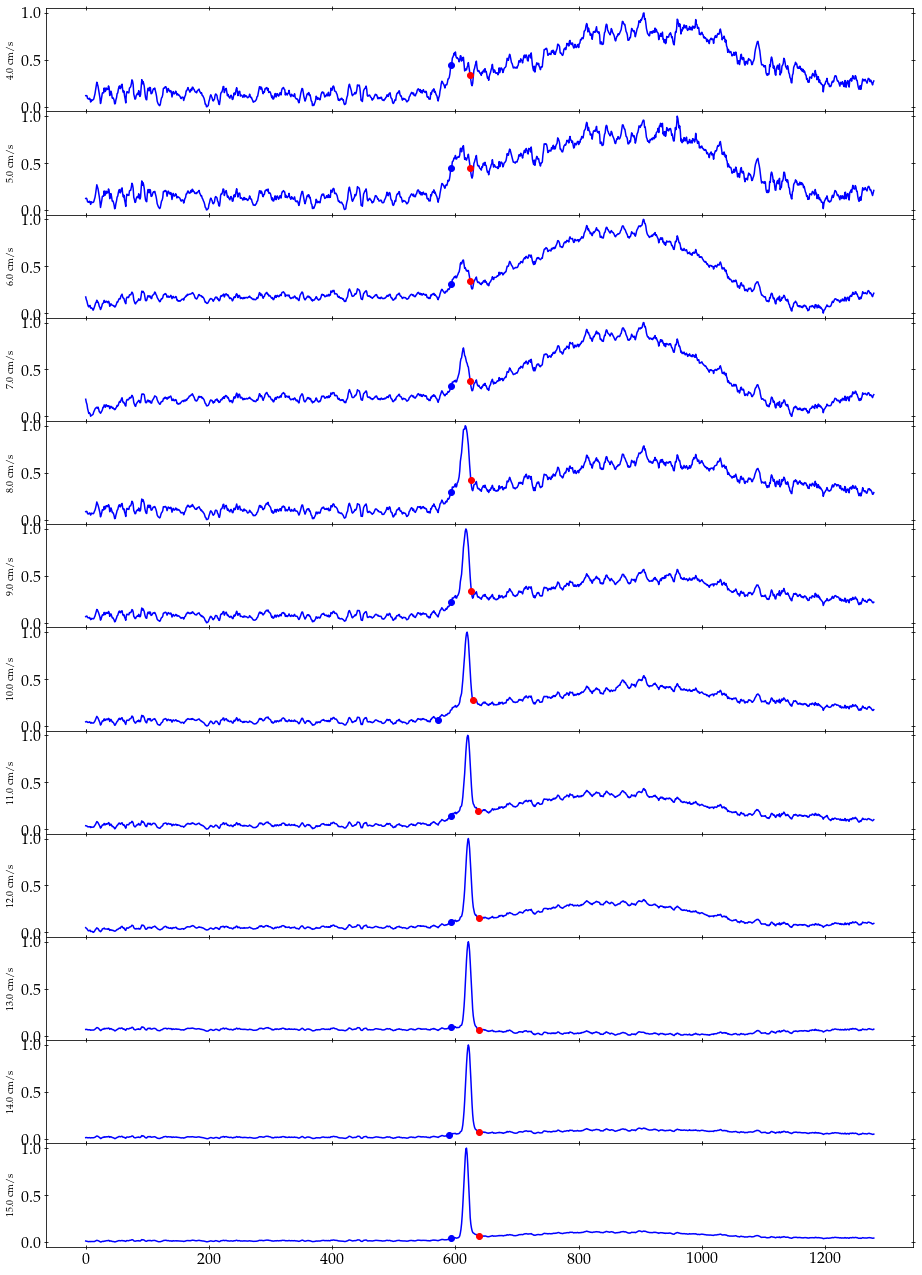

In [81]:
#index of extinction and ignition points
fig,ax = plt.subplots(len(v_f2),sharex=True)
fig.set_size_inches(14,20)
n = 6# the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
kk = 1
x_s = np.arange(1280)
xnn = []
n_ign = []
n_ext = []
fff = 4
kkk=100
for i in range(len(v_f2)):
        seq3 = rp.find_sequence_by('case',v=v_f2[i], phi =1)
        fft2 = rp.perform_analyses(seq3, camera=2, align=False)
        ggg = fft2[h]
        images = {'difference': ggg.without_filament[ch]}
        hdr3 = rp.get_entries(seq3,'hdr2')
        sig= mask(hdr3[h],images['difference'],xs).mean(axis=0)
#         sig = sig_0[:700]
        y = (lfilter(b,a,sig)-np.amin(lfilter(b,a,sig)))/(np.max(lfilter(b,a,sig))-np.amin(lfilter(b,a,sig)))   
        if v_f2[i]<=15:
            dy_dx = (y[1:]-y[:-1])/(x_s[1:]-x_s[:-1])
            dy_dx1 = norm(dy_dx)
            x_s1=x_s[:-1]
            n_ext.append(np.argmax(dy_dx1[570:605])+570-1)
            y1, x_n = M_avg(y,5)
            y2 = y1[::kk]
            x_n1 = x_n[::kk]
            dy_dx2 = (y2[1:]-y2[:-1])/(x_n1[1:]-x_n1[:-1])
            x_n2 = x_n1[:-1]
            n_zero = zero_cross(dy_dx2[600:660])+600
            n_ign.append(kk*n_zero)
            oo = [0,0]
            xoo = [0,1280]
#             ax[i].plot(x_n2,dy_dx2,'-',kk*n_zero,dy_dx2[n_zero],'o',xoo,oo,'r')
            print(n_ext[i])
            ax[i].plot(x_s,y,'b',n_ign[i],y[n_ign[i]],'ro',n_ext[i],y[n_ext[i]],'bo')
            ax[i].set_ylabel(str(v_f2[i])+' cm/s',fontsize = 10)
        else:
            for j,k in zip(range(len(test2)),frames2.keys()):
                pci2 = frames2[k][i]
                n_ext.append(int(np.argwhere(pci2.pos.x==pci2.x_flame[0])))
                n_ign.append(int(np.argwhere(pci2.pos.x==pci2.x_flame[2]))+10)
                ax[i].plot(x_s,y,'b',n_ign[i],y[n_ign[i]],'ro',n_ext[i],y[n_ext[i]],'bo')
                ax[i].set_ylabel(str(v_f2[i])+' cm/s',fontsize = 10)

In [82]:
print(n_ign,n_ext,len(n_ign),len(n_ext))

[624, 624, 624, 624, 625, 626, 628, 637, 638, 638, 639, 639] [593, 593, 593, 593, 593, 593, 571, 593, 593, 593, 590, 593] 12 12


Case: 2020_01_10_isooctane_57.8psig_6.04O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_10_isooctane_57.8psig_6.04O2_1mm)
 * perform_analysis -> isooctane_d76.2_v4.0_phi1.00_ps57.80_pa57.800000_pref1.455000_(ve160_phie0.65)
    <perform_analysis> ... returning buffered `Fourier` object
Case: 2020_01_10_isooctane_57.8psig_6.04O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_10_isooctane_57.8psig_6.04O2_1mm)
 * perform_analysis -> isooctane_d76.2_v5.0_phi1.00_ps57.80_pa57.800000_pref1.455000_(ve160_phie0.65)
    <perform_analysis> ... returning buffered `Fourier` object
Case: 2020_01_10_isooctane_57.8psig_6.04O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_10_isooctane_57.8psig_6.04O2_1mm)
 * perform_analysis -> isooctane_d76.2_v6.0_phi1.00_ps57.80_pa57.800000_pref1.455000_(ve160_phie0.65)
    <perform_analysis> ... returning buffered `Fourier` object
Case: 2020_01_10_isooctane_57.8psig_6.04O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_10_isooctane_57.8psig_6

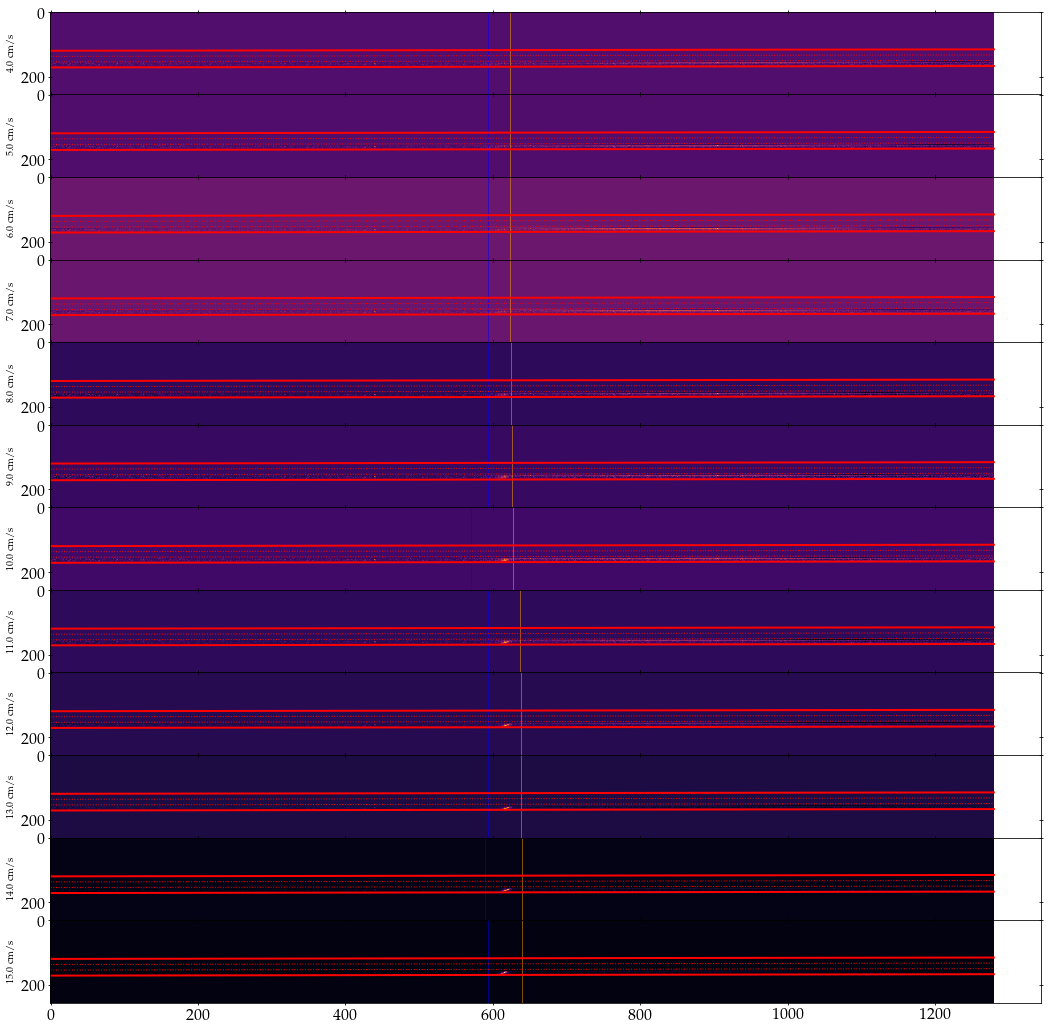

In [83]:
ch = 'f430x10h'
h = cases[1] #fuel 
xs = np.array([0,1280])
fig, ax = plt.subplots(len(v_f2), 1, sharex=True, sharey=True, figsize=(16,16))
  
for i in range(len(v_f2)):
    seq3 = rp.find_sequence_by('case',v=v_f2[i], phi =1)
    fft2 = rp.perform_analyses(seq3, camera=2, align=False)
    ggg = fft2[h]
    images = {'difference': ggg.without_filament[ch]}
    hdr3 = rp.get_entries(seq3,'hdr2')
    ys = hdr3[h].pos.tube_outline(xs)
    ax[i].axvline(x=n_ext[i],ymin=-1,ymax=1,c="blue",linewidth=0.5)
    ax[i].axvline(x=n_ign[i],ymin=-1,ymax=1,c="orange",linewidth=0.5)
#     ax[i].axvline(x=n_ext[i],ymin=ys['IDt'][0],ymax=ys['IDt'][1],linewidth=2, color='b')
    ax[i].imshow(mask(hdr3[h],images['difference'],xs), aspect='auto')
    line = ax[i].lines[0]
    line.get_xdata()
    ax[i].set_ylabel(str(v_f2[i])+' cm/s',fontsize = 10)
    for pos in ['ODt','ODb']:
        ax[i].plot(xs,ys[pos],'r-',linewidth=2)
    for pos in ['IDt','IDb']:
        ax[i].plot(xs,ys[pos],'r:',linewidth=1)
#     print(n_ign[i],ys['IDt'][0],ys['IDt'][1],n_ext[i])    


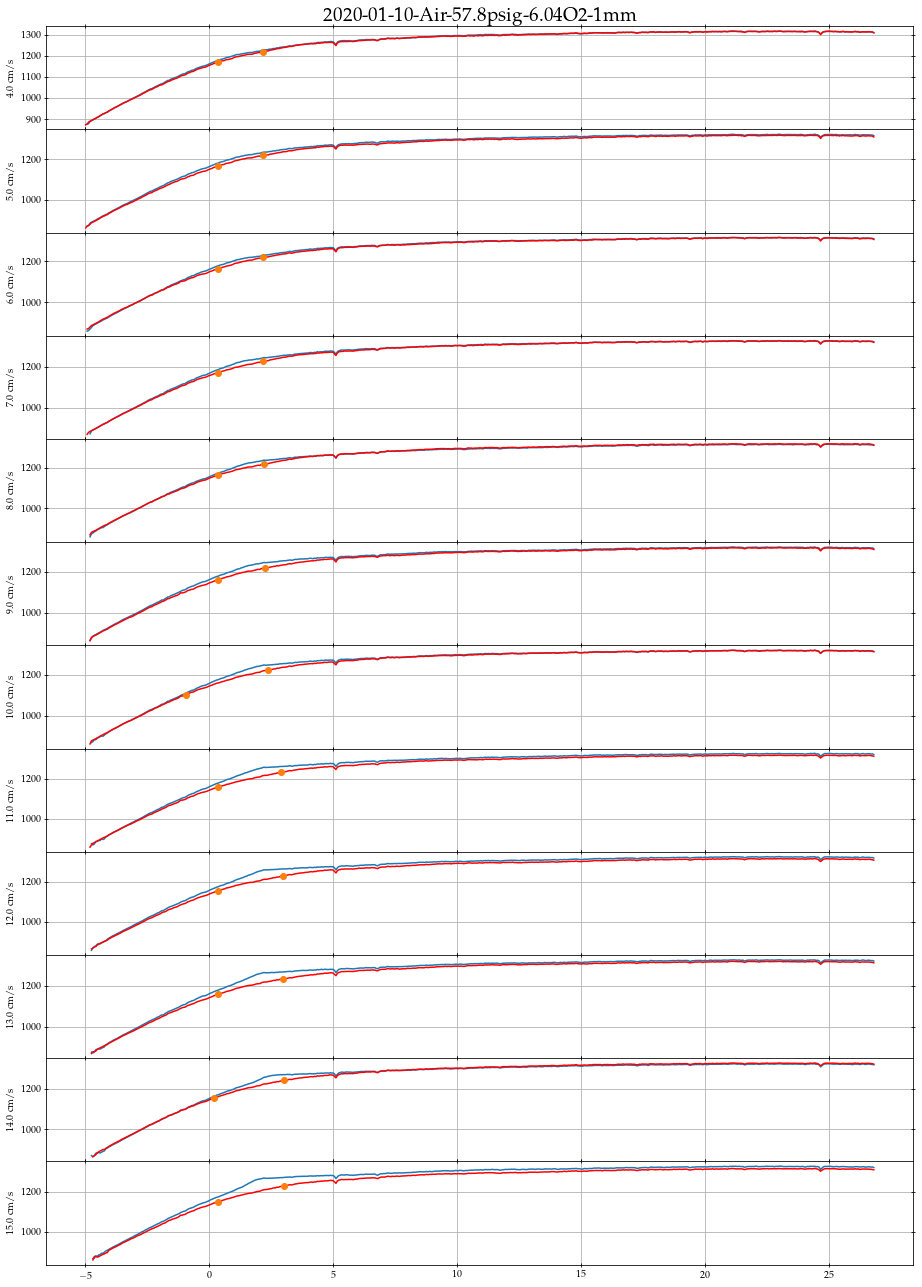

In [84]:
fig,ax = plt.subplots(n_vels2,1,sharex=True)
fig.set_size_inches(14,20)
T_ign = []
T_ext = []
T_d = []
for j in range(n_vels2):
    for i,k in zip(range(len(test2)),frames2.keys()):
        pci2 = frames2[k][j]
        for l in range(n_vels1):
            for i,k in zip(range(len(test1)),frames1.keys()):
                pci1 = frames1[k][j]
                if pci1.pyro is not None and pci2.pyro is not None: 
                    if v_f2[j]==v_f1[l]:
                        ax[j].plot(pci2.pos.x, pci2.pos.T)
                        ax[j].grid(True,which='major')
                        x_flame = [pci1.pos.x[n_ext[j]],pci1.pos.x[n_ign[j]]]
                        T_flame = [pci1.pos.T[n_ext[j]],pci1.pos.T[n_ign[j]]]
                        T_ign.append(pci1.pos.T[n_ign[j]]) 
                        T_ext.append(pci1.pos.T[n_ext[j]])
                        dd = pci1.pos.T[950]-pci2.pos.T[950]
                        T_d.append(dd)
                        ax[0].set_title(title1[0].replace('_', '-'))
                        ax[j].plot(pci1.pos.x,pci1.pos.T,'r',x_flame,T_flame,'o') 
                        ax[j].set_ylabel(str(v_f1[l])+' cm/s',fontsize = 10)
                        ax[j].tick_params(labelsize=10)
                    else:
                        continue

In [85]:
T_d

[-1.3144978388390882,
 -4.675996320157537,
 -1.0810837573337722,
 -0.8086419803973968,
 2.666583580551105,
 -3.4484016323260676,
 -0.559908398292464,
 -8.064993215622508,
 -9.484973494133328,
 -7.226370421250749,
 4.472578382668871,
 -11.091323698521819]

Text(0.5, 0, 'velocity (cm/s)')

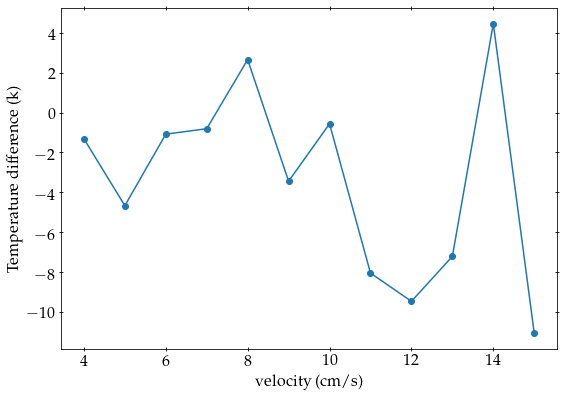

In [86]:
plt.plot(v_f2,T_d,'-o')
plt.ylabel('Temperature difference (k)')
plt.xlabel('velocity (cm/s)')

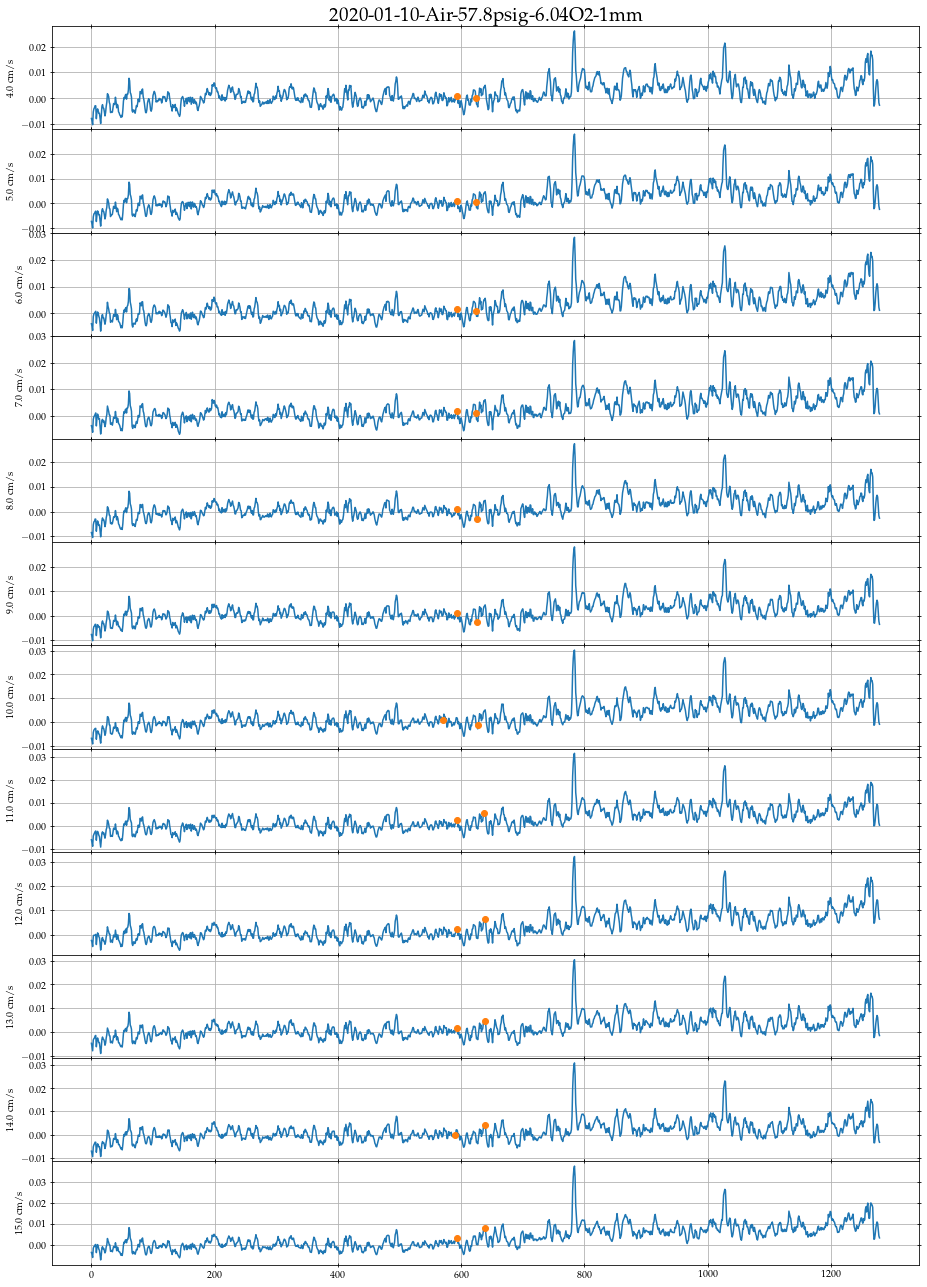

In [87]:
fig,ax = plt.subplots(n_vels2,1,sharex=True)
fig.set_size_inches(14,20)
T_ign = []
T_ext = []
x_s = np.arange(1280)
for j in range(n_vels2):
    for i,k in zip(range(len(test2)),frames2.keys()):
        pci2 = frames2[k][j]
        for l in range(n_vels1):
            for i,k in zip(range(len(test1)),frames1.keys()):
                pci1 = frames1[k][j]
                if pci1.pyro is not None and pci2.pyro is not None: 
                    if v_f2[j]==v_f1[l]:
                        ax[j].plot(x_s, pci2.data['f430x10h'])
                        ax[j].grid(True,which='major')
                        x_flame = [n_ext[j],n_ign[j]]
                        v_flame = [pci2.data['f430x10h'][n_ext[j]],pci2.data['f430x10h'][n_ign[j]]]
                        T_ign.append(pci1.pos.T[n_ign[j]]) 
                        T_ext.append(pci1.pos.T[n_ext[j]])
                        ax[0].set_title(title1[0].replace('_', '-'))
                        ax[j].plot(x_flame,v_flame,'o') 
                        ax[j].set_ylabel(str(v_f2[j])+' cm/s',fontsize = 10)
                        ax[j].tick_params(labelsize=10)

In [88]:
T_ign

[1221.5639039281016,
 1220.2338883318598,
 1220.3988867903204,
 1225.9907002994282,
 1221.1155512186804,
 1221.7631424597348,
 1223.939326513362,
 1232.1618377522443,
 1230.442757738699,
 1234.9973531367596,
 1240.4793250102462,
 1230.7940075222073]

In [89]:
T_ext

[1170.2723930551642,
 1166.1893353109147,
 1163.7236764168565,
 1170.8142665194155,
 1165.3933791533118,
 1162.4853737105532,
 1105.2022047865478,
 1158.1828639977841,
 1156.7056060756995,
 1159.6273932952743,
 1153.9665042479307,
 1150.4782046060318]

In [90]:
labels = {'xlabel':r'$v$ (cm/s)',
          'ylabel':r'Temperature $T$ (K)',
          'title':'',
          'legend':r'$\mathrm{CH^\star}$ (430 nm)',
          'legend2':r'v = 40 cm/s'}
limits = {'ylim':(900,1325,),
          'yticks':range(900,1400,50),
          'xlim':(0,90,),
          'xticks':range(0,100,10),
          'legend':'upper right'}
limits2 = {'ylim':(600,1325,),
          'yticks':range(600,1400,100),
          'xlim':(0,170,),
          'xticks':range(0,170,10),
          'legend':'upper right'}
limits3 = {'ylim':(950,1300,),
          'yticks':range(950,1300,10),
          'xlim':(0,1),
          'xticks':range(0,1,20),
          'legend':'lower right'}
#runs = np.unique(np.array(['nheptane']))
#runs = runs[np.argsort([ int(r[3:]) for r in runs ])][-1::-1]
#print(runs)
mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 16})
#col = mpl.rcParams['axes.color_cycle'] ## deprecated
col = [c['color'] for c in mpl.rcParams['axes.prop_cycle']]
leg_fsize = 10
lw = 1.7
col = ['blue','red']
#dashes = [(10., 0.1),(8.0, 2.0),(7.0, 2.0, 2.0, 2.0),(2.0, 2.0)]
dashes = [(8.0, 2.0),(10., 0.1),(7.0, 2.0, 2.0, 2.0),(4.0, 1.0)]
mv = MultipleLocator(25)
mh = MultipleLocator(5)

[None, None]

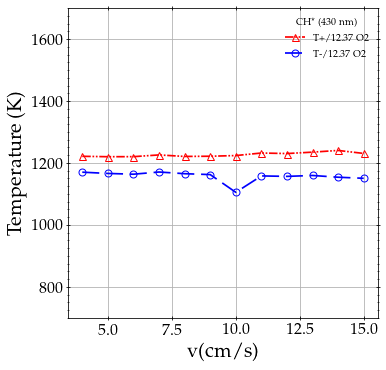

In [91]:
mv = MultipleLocator(25)
mh = MultipleLocator(5)
ht= 6
fig,ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
x=0
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['savefig.dpi'] = 500
ax.set_facecolor('none')
ax.set_ylim(700, 1700)
ax.set_xlabel('v(cm/s)', fontsize = 20) 
ax.yaxis.set_minor_locator(mv)
ax.xaxis.set_minor_locator(mh)
ax.plot(v_f2,T_ign,
                   linewidth=lw,linestyle=(0,(5,1,1,1,1,1)),
                   color = 'r', markerfacecolor= 'none',
                   marker='^',markersize=7,
                   label='T+/12.37 O2')

ax.plot(v_f2,T_ext,
                   linewidth=lw,linestyle=(0,(10,4)),
                   color = 'b',
                   marker='o',markersize=7,
                   markerfacecolor= 'none',
                   label='T-/12.37 O2')
ax.set_ylabel('Temperature (K)', fontsize = 20) 
ax.yaxis.set_minor_locator(mv)
ax.xaxis.set_minor_locator(mh)
leg = ax.legend()
leg.draw_frame(False)
leg.draw_frame(False)
leg = ax.legend(loc=limits2['legend'],prop={'size':leg_fsize},
                   title=labels['legend'])
leg.draw_frame(False)
leg.draw_frame(False)
plt.grid(b=None, which='major', axis='both')
plt.setp(leg.get_title(),fontsize=leg_fsize)

In [92]:
print(*n_ext,'_',*n_ign,sep='\n')

593
593
593
593
593
593
571
593
593
593
590
593
_
624
624
624
624
625
626
628
637
638
638
639
639


In [93]:
print(*T_ign,'_',*T_ext,'_',*v_f2,sep=',\n')

1221.5639039281016,
1220.2338883318598,
1220.3988867903204,
1225.9907002994282,
1221.1155512186804,
1221.7631424597348,
1223.939326513362,
1232.1618377522443,
1230.442757738699,
1234.9973531367596,
1240.4793250102462,
1230.7940075222073,
_,
1170.2723930551642,
1166.1893353109147,
1163.7236764168565,
1170.8142665194155,
1165.3933791533118,
1162.4853737105532,
1105.2022047865478,
1158.1828639977841,
1156.7056060756995,
1159.6273932952743,
1153.9665042479307,
1150.4782046060318,
_,
4.0,
5.0,
6.0,
7.0,
8.0,
9.0,
10.0,
11.0,
12.0,
13.0,
14.0,
15.0


In [58]:
v_f2

[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]

In [59]:


print(n_ign,n_ext,len(n_ign),len(n_ext))

[614, 614, 613, 613, 613, 614, 614, 614, 613, 614, 625, 617] [537, 525, 537, 537, 499, 499, 499, 499, 499, 525, 499, 576] 12 12
